In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv("../Radi/split/train.csv")

In [5]:
dev = pd.read_csv("../Radi/split/dev.csv")

In [6]:
test = pd.read_csv("../Radi/split/test.csv")

In [7]:
dataset = pd.read_csv("../data/train.csv")

In [8]:
companies = pd.Series(dataset["company1"].append(dataset["company2"]).value_counts().keys().values)
companies[:5]

0                   YouTube
1                    Google
2                Amazon.com
3    Verizon_Communications
4            Alexa_Internet
dtype: object

In [9]:
TEXT = "aliased_snippet"
RESULT = "is_parent"
COMPANY1= "company1"
COMPANY2 = "company2"

In [10]:
corpus = train[TEXT].append(dev[TEXT]).append(test[TEXT]).append(companies)
corpus.shape

(79834,)

In [14]:
train[:5]

,Unnamed: 0,company1,company2,is_parent,snippet,aliased_snippet
0,51579,Pfizer,Medivation,True,What Will Pfizer Gain FromMedivationn Inc Win...,what will company1 gain from company2 n inc ...
1,40891,The_Walt_Disney_Company,NBCUniversal,False,One media executive said it may be difficult ...,one media executive said it may be difficult ...
2,30797,AT&T,DirecTV,True,\r\nFailure of Comcast?s merger could also pre...,\r\nfailure of comcast?s merger could also pre...
3,70215,DStv,MultiChoice,False,MultiChoicee Ghana adds more local channels on...,company2 e ghana adds more local channels on ...
4,39242,Google,AT&T,False,"While Google won that battle, AT&T filed a la...","while company1 won that battle, company2 ..."


In [15]:
# the idea here is to add whether company1 is before company2
def add_company_pos_ratio(company, row): 
    index= row[TEXT].find(company)
    if index < 0:
        return 1
    return index / len(row[TEXT])

In [16]:
from sklearn.base import TransformerMixin,  BaseEstimator

In [17]:
class RatioPos(TransformerMixin,BaseEstimator):
    def __init__(self, company):
        self.company = company
    def transform(self, X, **kwargs):
        return X.apply((lambda x: add_company_pos_ratio(self.company, x)), axis=1)
    def fit(self, X, y=None, **kwargs):
        return self

In [18]:
train["company1_pos"] = RatioPos(COMPANY1).fit_transform(train)
train["company2_pos"] = RatioPos(COMPANY2).fit_transform(train)

In [19]:
train[train["company1_pos"] < 0].shape

(0, 8)

In [20]:
train[train["company2_pos"] < 0].shape

(0, 8)

In [21]:
train[:5]

,Unnamed: 0,company1,company2,is_parent,snippet,aliased_snippet,company1_pos,company2_pos
0,51579,Pfizer,Medivation,True,What Will Pfizer Gain FromMedivationn Inc Win...,what will company1 gain from company2 n inc ...,0.087302,0.246032
1,40891,The_Walt_Disney_Company,NBCUniversal,False,One media executive said it may be difficult ...,one media executive said it may be difficult ...,0.654545,0.386364
2,30797,AT&T,DirecTV,True,\r\nFailure of Comcast?s merger could also pre...,\r\nfailure of comcast?s merger could also pre...,0.294798,0.838150
3,70215,DStv,MultiChoice,False,MultiChoicee Ghana adds more local channels on...,company2 e ghana adds more local channels on ...,0.259887,0.005650
4,39242,Google,AT&T,False,"While Google won that battle, AT&T filed a la...","while company1 won that battle, company2 ...",0.071429,0.321429


In [22]:
train[train["company1_pos"] < 0][:5]

,Unnamed: 0,company1,company2,is_parent,snippet,aliased_snippet,company1_pos,company2_pos


In [23]:
train.iloc[1696][TEXT]

"\r\njob security arose as an issue earlier this year when  company2  said it would shift production of the equinox's  company2 c twin, the terrain, to mexico, leading to the elimination of 600 jobs. ###end###"

In [24]:
train.iloc[1696]["snippet"]

"\r\nJob security arose as an issue earlier this year when General_Motors said it would shift production of the Equinox's General_MotorsC twin, the Terrain, to Mexico, leading to the elimination of 600 jobs. ###END###"

In [25]:
filtered = train[train["company1_pos"] < 0]
filtered[filtered[RESULT] == True]

,Unnamed: 0,company1,company2,is_parent,snippet,aliased_snippet,company1_pos,company2_pos


In [26]:
train.iloc[49656][TEXT]

' company2 y revenue gets lift from theme parks, tv networks the main gate of entertainment giant walt  company2 y co. is pictured in burbank, california may 5, 2009. ###end###'

In [27]:
train.iloc[49656]["snippet"]

'Disney_Channely revenue gets lift from theme parks, TV networks The main gate of entertainment giant Walt Disney_Channely Co. is pictured in Burbank, California May 5, 2009. ###END###'

In [28]:
filtered[filtered[RESULT] == True].shape

(0, 8)

In [29]:
filtered = train[train["company1_pos"] < 0]
filtered[filtered[RESULT] == False].shape

(0, 8)

In [30]:
train[train[RESULT]== True][:5]

,Unnamed: 0,company1,company2,is_parent,snippet,aliased_snippet,company1_pos,company2_pos
0,51579,Pfizer,Medivation,True,What Will Pfizer Gain FromMedivationn Inc Win...,what will company1 gain from company2 n inc ...,0.087302,0.246032
2,30797,AT&T,DirecTV,True,\r\nFailure of Comcast?s merger could also pre...,\r\nfailure of comcast?s merger could also pre...,0.294798,0.838150
13,46975,Khazanah_Nasional,Malaysia_Airlines,True,\r\nSUBANG JAYA: The National Union of Flight ...,\r\nsubang jaya: the national union of flight ...,0.421053,0.612440
16,9438,Google,YouTube,True,"Since late 2016, viewers of Google's YouTube ...","since late 2016, viewers of company1 's com...",0.241935,0.346774
17,5185,Amazon.com,Alexa_Internet,True,First Alexa_Internet-enabled nonAmazon.comn de...,first company2 -enabled non company1 n device...,0.290000,0.070000


In [31]:
train[train[RESULT]== False][:5]

,Unnamed: 0,company1,company2,is_parent,snippet,aliased_snippet,company1_pos,company2_pos
1,40891,The_Walt_Disney_Company,NBCUniversal,False,One media executive said it may be difficult ...,one media executive said it may be difficult ...,0.654545,0.386364
3,70215,DStv,MultiChoice,False,MultiChoicee Ghana adds more local channels on...,company2 e ghana adds more local channels on ...,0.259887,0.005650
4,39242,Google,AT&T,False,"While Google won that battle, AT&T filed a la...","while company1 won that battle, company2 ...",0.071429,0.321429
5,80117,Google,SmartThings,False,When you try to add a new smart home device u...,when you try to add a new smart home device u...,0.878661,0.493724
6,70336,YouTube,Google,False,"owns Unruly, which competes with Google's You...","owns unruly, which competes with company2 's...",0.500000,0.364583


In [32]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [35]:
from sklearn.metrics import f1_score

In [36]:
# work in progress The idea is to train on the whole corpus and transofrm what is passed
class VectFeed(TransformerMixin,BaseEstimator):
    def __init__(self, vectorizer):
        self.vectorizer = vectorizer
        self.fitted = False
    def transform(self, X, **kwargs):
        text = X[TEXT]
        if not self.fitted:
            self.vectorizer.fit(corpus)
            self.fitted = True
           
        return self.vectorizer.transform(text)
            
        return vectorizer.transform(text)
    def fit(self, X, y=None, **kwargs):
        return self
    def set_params(self, **kwargs):
        self.vectorizer.set_params(kwargs)
        return self

In [37]:
def try_pipeline(pipeline, X, y, X_test, y_test):
    params = {
        "vect__input": corpus
    }
    
    pipeline.fit(X, y)
    
    predictions = pipeline.predict(X)
    print("Score on train set is: {}".format(pipeline.score(X,y)))
    print("F1 on train set is: {}".format(f1_score(y, predictions)))
    plot_confusion_matrix(y, predictions, classes=[0,1], normalize=True)
    predictions = pipeline.predict(X_test)
    print("Score on dev set is: {}".format(pipeline.score(X_test, y_test)))
    print("F1 on dev set is: {}".format(f1_score(y_test, predictions)))
    plot_confusion_matrix(y_test, predictions, classes=[0,1],normalize=True)

In [38]:
from sklearn.pipeline import FeatureUnion

In [39]:
class ArrayCaster(BaseEstimator, TransformerMixin):
    def __init__(self, transformer):
        self.transformer = transformer
        
    def fit(self, x, y=None):
        return self

    def transform(self, data):
        result = self.transformer.fit_transform(data)
        return np.transpose(np.matrix(result))

In [40]:
features = FeatureUnion([
        ("pos_company1", ArrayCaster(RatioPos(COMPANY1))),
        ("pos_company2", ArrayCaster(RatioPos(COMPANY2))),
        ("vect", VectFeed(TfidfVectorizer())),
    ])

In [ ]:
features.fit_transform(train[:5]).shape

In [ ]:
features.fit_transform(train[:5])[0].todense()[0]

### Logistic Regression

After using TfidfVectorizer transform and testing Logistic Regression classifier using the default transformer and algorithm's parameter values, we scored a 0.22 f1_score.

Score on train set is: 0.8370105096458393
F1 on train set is: 0.6560328130340664


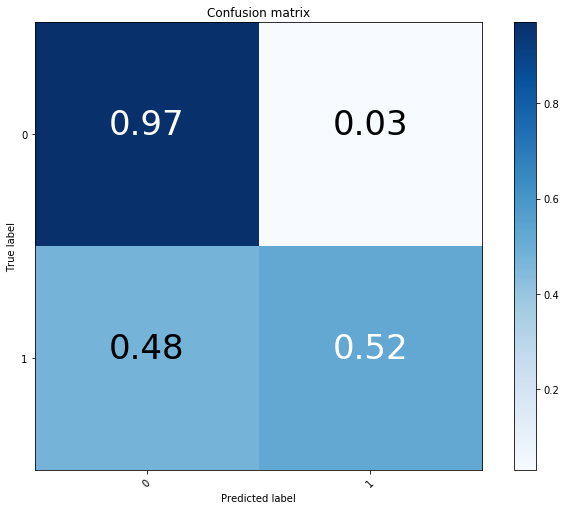

Score on dev set is: 0.7602040816326531
F1 on dev set is: 0.464481642987762


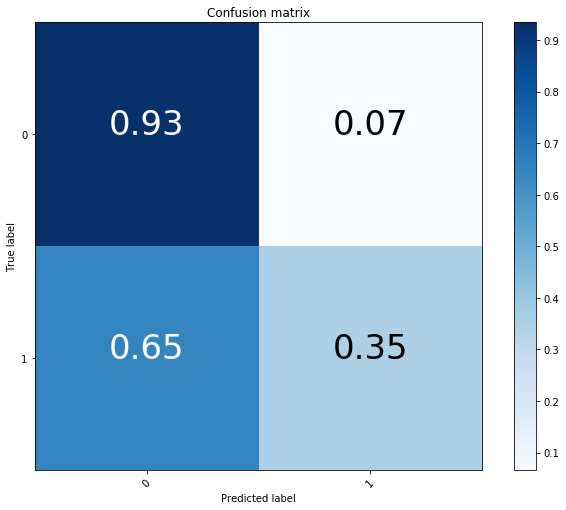

In [59]:
pipeline = Pipeline([
    ("union", features),
    ("classifier", LogisticRegression())
])


try_pipeline(pipeline, train, train[RESULT], dev, dev[RESULT])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="yes")

#### Trying to tune our hyperparameters

##### NestedLoop_GridSearch

Because we were having problem passing our parameter values from GridSearch(param_grid=) to VectFeed(Tfidfvectorizer()), we achieved the same functionality with passing the parameter values manually with a nested loop.

In [ ]:
tfidf__ngram_range = [(1, 1), (1, 2), (1, 3)]
tfidf__norm = ['l1', 'l2']
tfidf__max_df = [0.80, 1]

scores = []

for ngram_range in tfidf__ngram_range:
    for norm in tfidf__norm:
        for max_df in tfidf__max_df:
            features = FeatureUnion([
                    ("pos_company1", ArrayCaster(RatioPos(COMPANY1))),
                    ("pos_company2", ArrayCaster(RatioPos(COMPANY2))),
                    ("vect", VectFeed(TfidfVectorizer(analyzer=analyzer, ngram_range=ngram_range, norm=norm, max_df=max_df))),
                ])

            pipeline = Pipeline([
                ("union", features),
                ("classifier", LogisticRegression())
            ])

            param_grid = {
                    'classifier__C': [0.01, 0.1, 1, 10],
                    'classifier__class_weight' : ['balanced'],
            }

            grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid, error_score=f1_scorer)
            grid.fit(train, train[RESULT])
            mean_scores = np.array(grid.cv_results_['mean_test_score'])
            scores.append([('mean_score', mean_scores), ('C', grid.best_params_['classifier__C']), ('norm', norm), ('ngram_range', ngram_range), ('max_df', max_df)])


In [ ]:
scores

After running our NestedLoop_GridSearch, the parameter values that gave us the best mean score of f1_scores, are the following
for TfidfVectorizer: { ngram_range = (1, 2),
                       norm = 'l2', 
                       max_df = 0.8 
                     }
for LogisticRegression: { C = 0.1,
                          class_weight = 'balanced'
                        }

Score on train set is: 0.7197667722430175
F1 on train set is: 0.6097634322373697


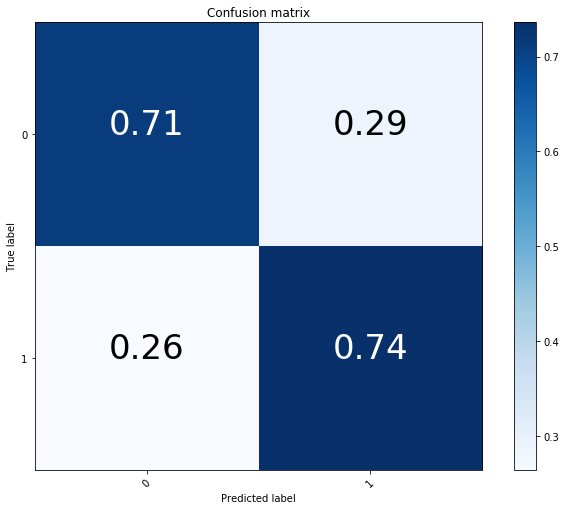

Score on dev set is: 0.6909171075837742
F1 on dev set is: 0.5672457888702708


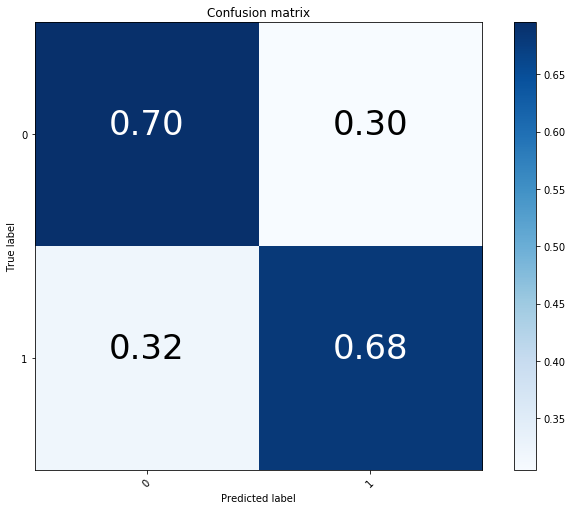

In [57]:
features = FeatureUnion([
        ("pos_company1", ArrayCaster(RatioPos(COMPANY1))),
        ("pos_company2", ArrayCaster(RatioPos(COMPANY2))),
        ("vect", VectFeed(TfidfVectorizer(ngram_range=(1, 2), norm='l2', max_df=0.8))),
    ])

pipeline = Pipeline([
    ("union", features),
    ("classifier", LogisticRegression(C=0.1, class_weight='balanced'))
])


try_pipeline(pipeline, train, train[RESULT], dev, dev[RESULT])


Testing our model with the parameter values that gave the best mean score (of f1_scores), after NestedLoop_GridSearch, 
we managed to raise our f1_score: 0.56

#### Final test

As a final test, in order to compare efficiently our models, we are going to use the train (70%) and dev (20%) as our final train set (70% + 20% = 90%) and the rest of 10% as the actual test.

But first we should add the two new features in the dev set.

In [41]:
dev["company1_pos"] = RatioPos(COMPANY1).fit_transform(train)
dev["company2_pos"] = RatioPos(COMPANY2).fit_transform(train)

In [49]:
finalTrain = train.append(dev)
finalTrain.shape

(71444, 8)

Score on train set is: 0.7256312636470522
F1 on train set is: 0.6171633920549979


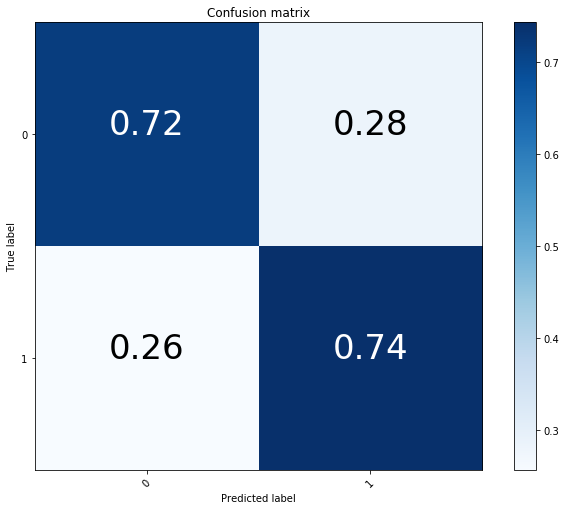

Score on dev set is: 0.6983247260360247
F1 on dev set is: 0.5784192923781025


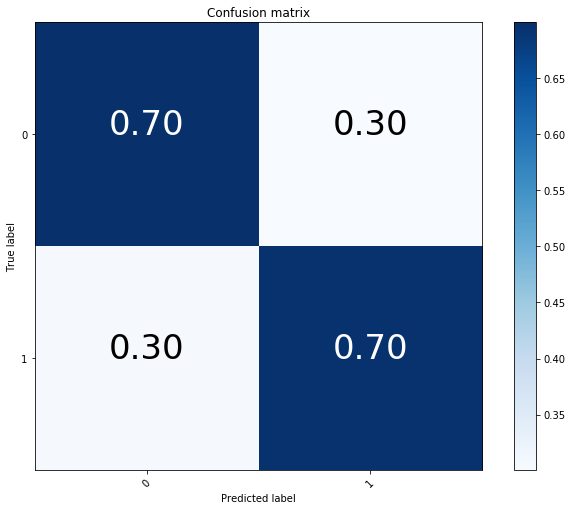

In [53]:
features = FeatureUnion([
        ("pos_company1", ArrayCaster(RatioPos(COMPANY1))),
        ("pos_company2", ArrayCaster(RatioPos(COMPANY2))),
        ("vect", VectFeed(TfidfVectorizer(ngram_range=(1, 2), norm='l2', max_df=0.8))),
    ])

pipeline = Pipeline([
    ("union", features),
    ("classifier", LogisticRegression(C=0.1, class_weight='balanced'))
])


try_pipeline(pipeline, finalTrain, finalTrain[RESULT], test, test[RESULT])

An f1_score of 0.57 was achived in the final test.

### LinearSVC

As in Logistic Regression, we will first train our model with the default parameters.

Score on train set is: 0.7764540742873597
F1 on train set is: 0.5491761631705017


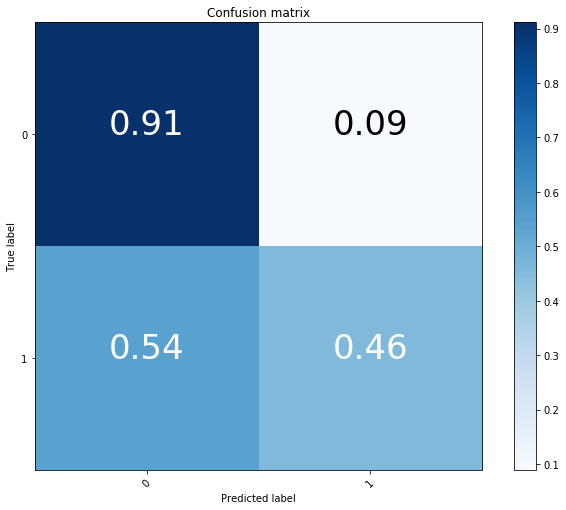

Score on dev set is: 0.6254724111866969
F1 on dev set is: 0.25804841527327177


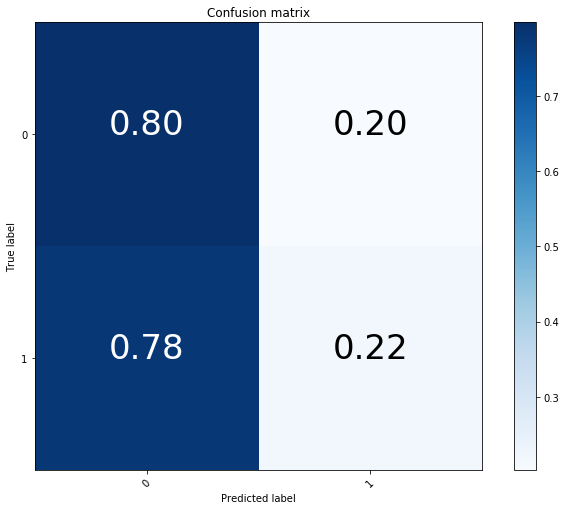

In [60]:
features = FeatureUnion([
        ("pos_company1", ArrayCaster(RatioPos(COMPANY1))),
        ("pos_company2", ArrayCaster(RatioPos(COMPANY2))),
        ("vect", VectFeed(TfidfVectorizer())),
    ])

pipeline = Pipeline([
    ("union", features),
    ("classifier", LinearSVC())
])

try_pipeline(pipeline, train, train[RESULT], dev, dev[RESULT])

As it was expected, we have a low f1_score: 0.25

#### Trying to tune our hyperparameters

We will try to tune our hyperparameters with our NestedLoop_GridSearch method, in order to get the highest possible 
f1_score.

In [ ]:
tfidf__ngram_range = [(1, 1), (1, 2), (1, 3)]
tfidf__norm = ['l1', 'l2']
tfidf__max_df = [0.80, 1]

scores = []

for ngram_range in tfidf__ngram_range:
    for norm in tfidf__norm:
        for max_df in tfidf__max_df:
            features = FeatureUnion([
                    ("pos_company1", ArrayCaster(RatioPos(COMPANY1))),
                    ("pos_company2", ArrayCaster(RatioPos(COMPANY2))),
                    ("vect", VectFeed(TfidfVectorizer(ngram_range=ngram_range, norm=norm, max_df=max_df))),
                ])

            pipeline = Pipeline([
                ("union", features),
                ("classifier", LinearSVC())
            ])

            param_grid = {
                    'classifier__C': [0.01, 0.1, 1]
            }

            grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid, error_score=f1_scorer)
            grid.fit(train, train[RESULT])
            mean_scores = np.array(grid.cv_results_['mean_test_score'])
            scores.append([('mean_score', mean_scores),('C', grid.best_params_['classifier__C']), ('norm', norm), ('ngram_range', ngram_range), ('max_df', max_df)])


In [ ]:
scores

After running our NestedLoop_GridSearch, the parameter values that gave us the best mean score of f1_scores, are the following
for TfidfVectorizer: { ngram_range = (1, 2),
                       norm = 'l2', 
                       max_df = 0.8 
                     }
for LinearSVC: { C = 0.1,
                 class_weight = 'balanced'
               }

Score on train set is: 0.8396739130434783
F1 on train set is: 0.7658914728682171


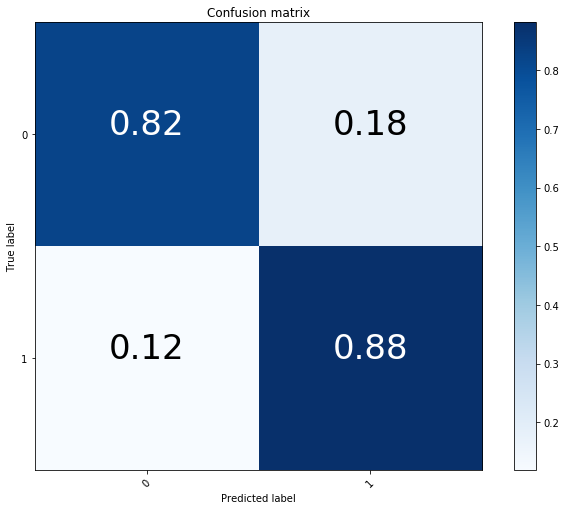

Score on dev set is: 0.732615268329554
F1 on dev set is: 0.6041219807889583


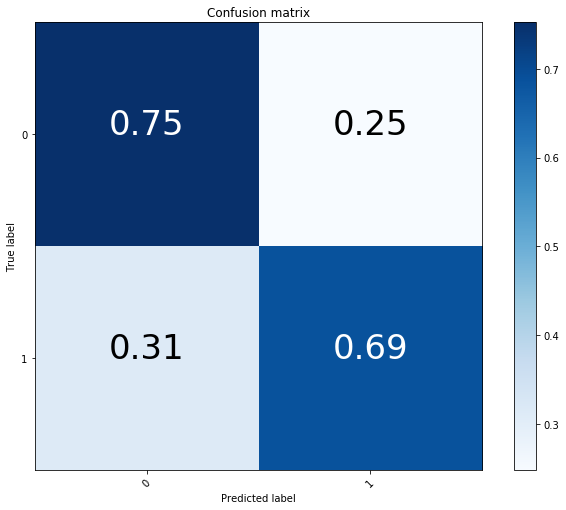

In [54]:
features = FeatureUnion([
        ("pos_company1", ArrayCaster(RatioPos(COMPANY1))),
        ("pos_company2", ArrayCaster(RatioPos(COMPANY2))),
        ("vect", VectFeed(TfidfVectorizer(ngram_range=(1, 2), norm='l2', max_df=0.8))),
    ])

pipeline = Pipeline([
    ("union", features),
    ("classifier", LinearSVC(C=0.1, class_weight='balanced'))
])


try_pipeline(pipeline, train, train[RESULT], dev, dev[RESULT])

After tuning our parameters, we managed to achieve a f1_score of: 0.60. This score seems to be the highiest within our 
classical machine learning approach.

#### Final Test

Using the parameters that gave us the best results so far

Score on train set is: 0.8325961592296064
F1 on train set is: 0.7571968005197125


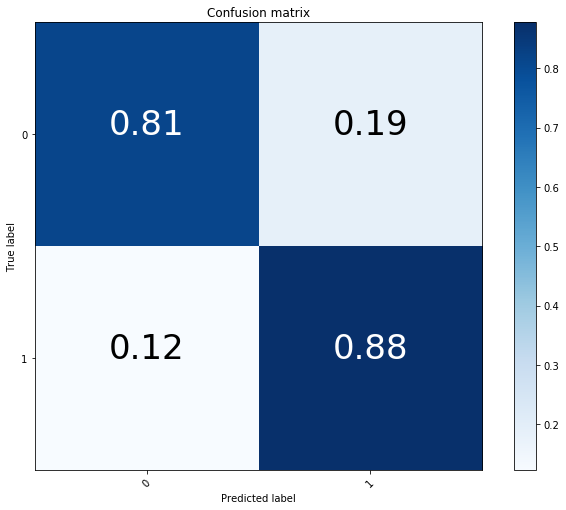

Score on dev set is: 0.7317042448671117
F1 on dev set is: 0.6042363433667782


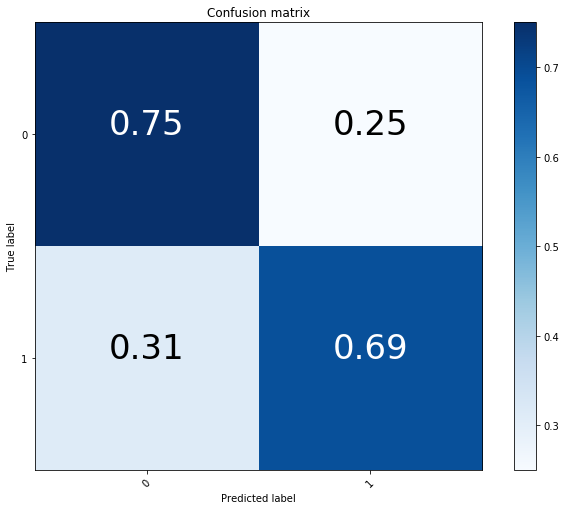

In [56]:
features = FeatureUnion([
        ("pos_company1", ArrayCaster(RatioPos(COMPANY1))),
        ("pos_company2", ArrayCaster(RatioPos(COMPANY2))),
        ("vect", VectFeed(TfidfVectorizer(ngram_range=(1, 2), norm='l2', max_df=0.8))),
    ])

pipeline = Pipeline([
    ("union", features),
    ("classifier", LinearSVC(C=0.1, class_weight='balanced'))
])


try_pipeline(pipeline, finalTrain, finalTrain[RESULT], test, test[RESULT])

### MultinomialNB

Testing MultinomialNB with poor results

In [ ]:
pipeline = Pipeline([
    ("union", features),
    ("classifier", MultinomialNB())
])

try_pipeline(pipeline, train, train[RESULT], dev, dev[RESULT])

Lastly I will check what goes on when using linear naive b

In [ ]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [ ]:
def get_mdl(train, y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = train.multiply(r)
    return m.fit(x_nb, y), r

In [ ]:
# corpus = pd.read_csv("../data/train.csv")
# vec = TfidfVectorizer(ngram_range=(1,2),
#                min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
#                smooth_idf=1, sublinear_tf=1 )
# vec.fit(corpus)